# I. Import data set and the required library

In [1]:
# Let's import the required libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings("ignore")
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Define figure style
sns.set()
plt.style.use("seaborn-whitegrid")
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.set_style("whitegrid")

<IPython.core.display.Javascript object>

In [3]:
# Import data set
boston_df = pd.read_csv(
    "Boston_Scientific.csv", sep=";", decimal=",", encoding="latin-1"
)

boston_df["Date"] = pd.to_datetime(boston_df["Date"])
boston_df["Date"] = boston_df["Date"].dt.strftime("%Y.%m.%d")

print(f"Data shape: {boston_df.shape}")
boston_df.head()

Data shape: (1602, 4)


,Date,Users,Lockdown_flag,Campaigns_flag
0,2017.01.11,1,0,0
1,2017.01.12,1,0,0
2,2017.01.13,1,0,0
3,2017.01.14,1,0,0
4,2017.01.15,3,0,0


<IPython.core.display.Javascript object>

# II. Features engineering

### II.1. Let's describe the period related to the Lockdown of covid-19
- if the period is before the first lockdown of May 2017, the period will be called Before_lockdown
- if it's after the last lockdown of January 2021, the period will be called After_lockdown
- if it's between two lockdowns, the period will be called Between_lockdown
- if it's during a lockdown, the period will be called Lockdown 

In [4]:
def lockdown_function(value):
    """A function that describes the Lockdown"""

    if value < "2020.03.17":
        return "Before_lockdown"

    elif (value >= "2020.03.17") & (value <= "2020.05.17"):
        return "Lockdown"

    elif (value > "2020.05.17") & (value < "2020.11.11"):
        return "Between_lockdown"

    elif (value >= "2020.11.11") & (value <= "2020.11.30"):
        return "Lockdown"

    elif (value > "2020.11.30") & (value < "2020.12.31"):
        return "Between_lockdown"

    elif (value >= "2020.12.31") & (value <= "2021.01.03"):
        return "Lockdown"

    elif value > "2021.01.03":
        return "After_lockdown"


boston_df["Lockdown_period"] = boston_df["Date"].apply(lockdown_function)
boston_df

,Date,Users,Lockdown_flag,Campaigns_flag,Lockdown_period
0,2017.01.11,1,0,0,Before_lockdown
1,2017.01.12,1,0,0,Before_lockdown
2,2017.01.13,1,0,0,Before_lockdown
3,2017.01.14,1,0,0,Before_lockdown
4,2017.01.15,3,0,0,Before_lockdown
...,...,...,...,...,...
1597,2021.05.27,16,0,0,After_lockdown
1598,2021.05.28,13,0,0,After_lockdown
1599,2021.05.29,6,0,0,After_lockdown
1600,2021.05.30,4,0,0,After_lockdown


<IPython.core.display.Javascript object>

### II.2. Let's create time features like year, day of the year, quarter, month, day, weekdays, etc.

In [5]:
boston_df["year"] = pd.DatetimeIndex(boston_df["Date"]).year
boston_df["month"] = pd.DatetimeIndex(boston_df["Date"]).month
boston_df["day"] = pd.DatetimeIndex(boston_df["Date"]).day
boston_df["dayofyear"] = pd.DatetimeIndex(boston_df["Date"]).dayofyear
boston_df["weekofyear"] = pd.DatetimeIndex(boston_df["Date"]).weekofyear
boston_df["weekday"] = pd.DatetimeIndex(boston_df["Date"]).weekday
boston_df["quarter"] = pd.DatetimeIndex(boston_df["Date"]).quarter
boston_df["is_month_start"] = pd.DatetimeIndex(boston_df["Date"]).is_month_start
boston_df["is_month_end"] = pd.DatetimeIndex(boston_df["Date"]).is_month_end

# Drop the year
boston_df.drop(["year"], axis=1, inplace=True)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             1602 non-null   object
 1   Users            1602 non-null   int64 
 2   Lockdown_flag    1602 non-null   int64 
 3   Campaigns_flag   1602 non-null   int64 
 4   Lockdown_period  1602 non-null   object
 5   month            1602 non-null   int64 
 6   day              1602 non-null   int64 
 7   dayofyear        1602 non-null   int64 
 8   weekofyear       1602 non-null   int64 
 9   weekday          1602 non-null   int64 
 10  quarter          1602 non-null   int64 
 11  is_month_start   1602 non-null   bool  
 12  is_month_end     1602 non-null   bool  
dtypes: bool(2), int64(9), object(2)
memory usage: 140.9+ KB


<IPython.core.display.Javascript object>

### II.3. Dummy Encoding

Some of the variables in the dataset, such as month or quarter, need to be treated as categorical variables. 

In [6]:
# Dummy Encoding

x1 = [
    "Lockdown_period",
    "month",
    "weekday",
    "quarter",
    "is_month_start",
    "is_month_end",
]

x2 = [
    "",
    "month",
    "wday",
    "qrtr",
    "m_start",
    "m_end",
]

for i, j in zip(x1, x2):
    boston_df = pd.get_dummies(
        boston_df, columns=[i], drop_first=False, prefix=j
    )  # drop_first=True,

# Drop columns that we will not use in the models
my_data = boston_df.drop(["Date", "Lockdown_flag"], axis=1)

<IPython.core.display.Javascript object>

# III.  Preparing data for modeling

### III.1. Log transformation of the target variable 'Users'

Text(0, 0.5, '')

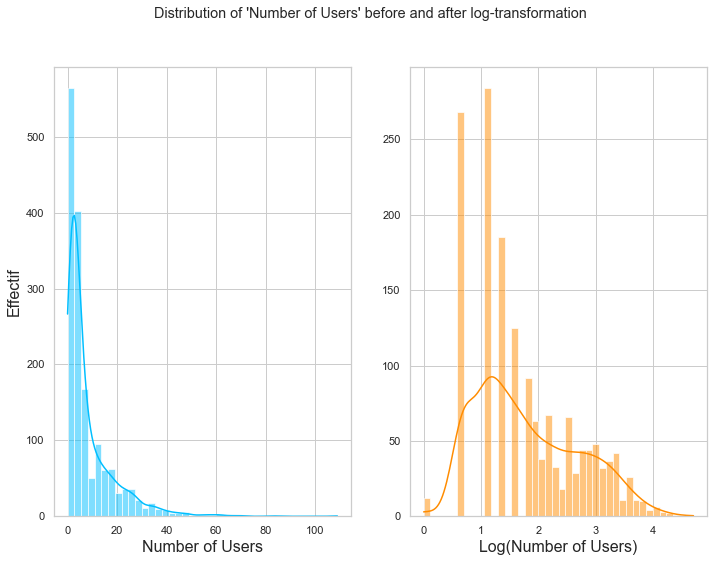

<IPython.core.display.Javascript object>

In [7]:
# Log transformation of the target variable "SalePrice"
my_data["UsersLog"] = np.log(my_data.Users + 1)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'Number of Users' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=my_data["Users"], kde=True, bins=40, color="deepskyblue")
p.set_xlabel("Number of Users", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(
    ax=axes[1], x=my_data["UsersLog"], kde=True, bins=40, color="darkorange"
)
q.set_xlabel("Log(Number of Users)", fontsize=16)
q.set_ylabel("", fontsize=16)

In [8]:
# Drop the original column 'Users'
my_data.drop(["Users"], axis=1, inplace=True)
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaigns_flag     1602 non-null   int64  
 1   day                1602 non-null   int64  
 2   dayofyear          1602 non-null   int64  
 3   weekofyear         1602 non-null   int64  
 4   _After_lockdown    1602 non-null   uint8  
 5   _Before_lockdown   1602 non-null   uint8  
 6   _Between_lockdown  1602 non-null   uint8  
 7   _Lockdown          1602 non-null   uint8  
 8   month_1            1602 non-null   uint8  
 9   month_2            1602 non-null   uint8  
 10  month_3            1602 non-null   uint8  
 11  month_4            1602 non-null   uint8  
 12  month_5            1602 non-null   uint8  
 13  month_6            1602 non-null   uint8  
 14  month_7            1602 non-null   uint8  
 15  month_8            1602 non-null   uint8  
 16  month_9            1602 

<IPython.core.display.Javascript object>

In [9]:
# Let's check if there is any missing values in my data
print(f"Number of rows with missing values: {my_data.isnull().any(axis=1).mean()}")

Number of rows with missing values: 0.0


<IPython.core.display.Javascript object>

### III.2. Split the data into train and test set

Train dates : n=1282
Test dates  : n=320


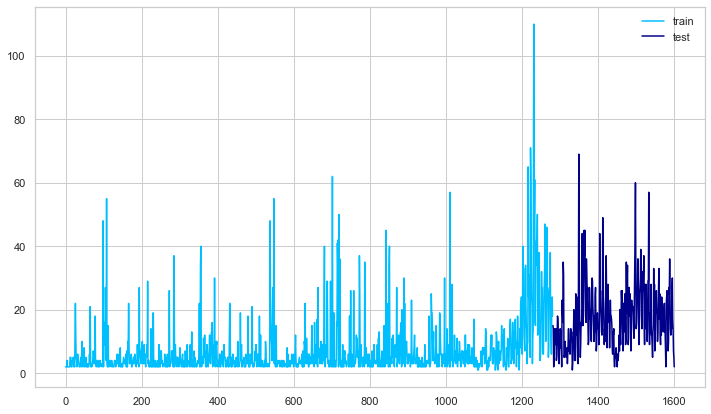

<IPython.core.display.Javascript object>

In [10]:
# Split data into train and test set

steps = int(round((len(my_data) * 0.2), 0))  # 80% train set and 20% test set

data_train = my_data[:-steps]
data_test = my_data[-steps:]

print(f"Train dates : n={len(data_train)}")
print(f"Test dates  : n={len(data_test)}")

fig, ax = plt.subplots(figsize=(12, 7))
np.exp(data_train["UsersLog"]).plot(ax=ax, label="train", color="deepskyblue")
np.exp(data_test["UsersLog"]).plot(ax=ax, label="test", color="darkblue")
ax.legend()

In [11]:
# X_train, y_train
target_column_train = ["UsersLog"]
predictors_train = list(set(list(data_train.columns)) - set(target_column_train))

X_train = data_train[predictors_train].values
y_train = data_train[target_column_train].values

print(f"X_train{X_train.shape}")
print(f"y_train{y_train.shape}\n")


# X_test, y_test
target_column_test = ["UsersLog"]
predictors_test = list(set(list(data_test.columns)) - set(target_column_test))

X_test = data_test[predictors_test].values
y_test = data_test[target_column_test].values

print(f"X_test{X_test.shape}")
print(f"y_test{y_test.shape}")

X_train(1282, 35)
y_train(1282, 1)

X_test(320, 35)
y_test(320, 1)


<IPython.core.display.Javascript object>

### III.3. Standardize the independent variables

In [12]:
from sklearn import preprocessing

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

<IPython.core.display.Javascript object>

# III. Modeling

### III.1. RandomForestRegressor

<font color='darkblue'>Random Forest Regression it’s a meta estimator that fits a number of Decision Trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[Click here for more information about Random Forest Regression](https://towardsdatascience.com/a-practical-introduction-to-9-regression-algorithms-389057f86eb9)<font>

In [13]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

<IPython.core.display.Javascript object>

In [14]:
# Model optimisation
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
tuned_parameters = {"n_estimators": [1000, 5000, 10000],
                    "max_depth": [5, 10, 20]}

# GridSearch
rfr_cv = GridSearchCV(
    RandomForestRegressor(),
    tuned_parameters,
    cv=10,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
)

# fit the GridSearch on train set
rfr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {rfr_cv.best_params_}")

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best hyperparameters: {'max_depth': 5, 'n_estimators': 1000}


<IPython.core.display.Javascript object>

In [15]:
# Random Forest model
model_rf = RandomForestRegressor(
    n_estimators=rfr_cv.best_params_["n_estimators"],
    max_depth=rfr_cv.best_params_["max_depth"],
    oob_score=True,
    random_state=100,
)

# Fit the model
model_rf.fit(X_train, y_train)
pred_train_rf = model_rf.predict(X_train)
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train, pred_train_rf))}")

pred_test_rf = model_rf.predict(X_test)
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test, pred_test_rf))}")

RMSE (train): 0.6550732297514316
RMSE (test): 0.9483635023416347


<IPython.core.display.Javascript object>

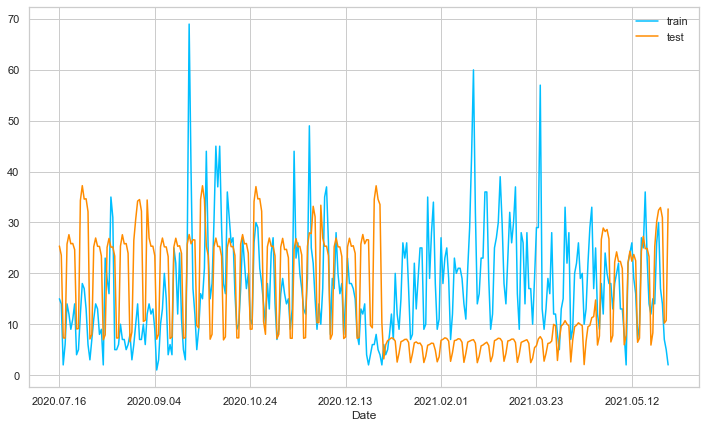

<IPython.core.display.Javascript object>

In [16]:
# Plot the results
results = boston_df.iloc[1282:, :1]

test_values = []
for i in range(0, len(data_test)):
    test_values.append(y_test[i][0])

results["test"] = test_values
results["pred"] = pred_test_rf
results = results.set_index("Date")

# Fig
fig, ax = plt.subplots(figsize=(12, 7))
np.exp(results["test"]).plot(ax=ax, label="train", color="deepskyblue")
np.exp(results["pred"]).plot(ax=ax, label="test", color="darkorange")
ax.legend()

### III.2. XGBoost regression

<font color='darkblue'>XGBoost is one of the most popular algorithms that are based on Gradient Boosted Machines. Gradient Boosting refers to a methodology where an ensemble of weak learners is used to improve the model performance in terms of efficiency, accuracy, and interpretability. Gradient Boosting can be applied to a regression by taking the average of the outputs by the weak learners. <font>

[Click here for more information about XGBoost](https://neptune.ai/blog/xgboost-vs-lightgbm)

In [17]:
from xgboost import XGBRegressor

# Define hyperparameters
tuned_parameters = {
    "learning_rate": [0.01, 0.05],
    "n_estimators": [1000, 5000, 10000],
    "colsample_bytree": [0.3],
    "max_depth": [5, 10, 20],
}

# GridSearch
xgbr_cv = GridSearchCV(
    estimator=XGBRegressor(seed=20),
    param_grid=tuned_parameters,
    cv=10,
    n_jobs=-1,
    verbose=1,
    scoring="r2",
)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}



<IPython.core.display.Javascript object>

In [38]:
# XGB Regressor with the best hyperparameters
xgb_mod = XGBRegressor(
    seed=20,
    colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
    learning_rate=xgbr_cv.best_params_["learning_rate"],
    n_estimators=xgbr_cv.best_params_["n_estimators"],
    max_depth=xgbr_cv.best_params_["max_depth"],
)

# Fit the model
xgb_mod.fit(X_train, y_train)

pred_train_xgb = xgb_mod.predict(X_train)
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train, pred_train_xgb))}")

pred_test_xgb = xgb_mod.predict(X_test)
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test, pred_test_xgb))}")

RMSE (train): 0.553973550540202
RMSE (test): 0.9057761024289341


<IPython.core.display.Javascript object>

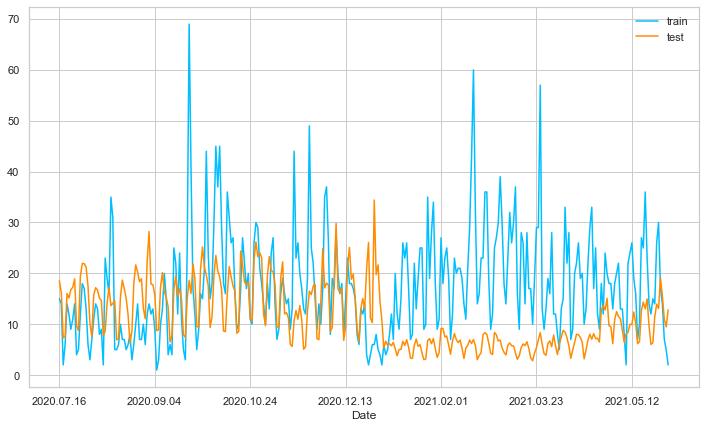

<IPython.core.display.Javascript object>

In [39]:
# Plot the results
results = boston_df.iloc[1282:, :1]

test_values = []
for i in range(0, len(data_test)):
    test_values.append(y_test[i][0])

results["test"] = test_values
results["pred"] = pred_test_xgb
results = results.set_index("Date")

# Fig
fig, ax = plt.subplots(figsize=(12, 7))
np.exp(results["test"]).plot(ax=ax, label="train", color="deepskyblue")
np.exp(results["pred"]).plot(ax=ax, label="test", color="darkorange")
ax.legend()

### III.3. LightGBM regression

<font color='darkblue'> LightGBM is also one of the most popular algorithms that are based on Gradient Boosted Machines.<font>

[Click here for more information about LightGBM](https://neptune.ai/blog/xgboost-vs-lightgbm)

In [21]:
from lightgbm import LGBMRegressor

# Define hyperparameters
tuned_parameters = {
    "max_depth": [5, 10, 20],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [1000, 5000, 10000],
}

# GridSearch
lgbm_cv = GridSearchCV(
    estimator=LGBMRegressor(), param_grid=tuned_parameters, cv=10, n_jobs=-1, verbose=1
)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}



<IPython.core.display.Javascript object>

In [22]:
# LGBM Regressor with the best hyperparameters
lgb_mod = LGBMRegressor(
    learning_rate=lgbm_cv.best_params_["learning_rate"],
    max_depth=lgbm_cv.best_params_["max_depth"],
    n_estimators=lgbm_cv.best_params_["n_estimators"],
)

# Fit the model
lgb_mod.fit(X_train, y_train)

pred_train_lgb = lgb_mod.predict(X_train)
print(f"RMSE (train): {np.sqrt(mean_squared_error(y_train, pred_train_lgb))}")

pred_test_lgb = lgb_mod.predict(X_test)
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test, pred_test_lgb))}")

RMSE (train): 0.6236307386837482
RMSE (test): 0.9109522077694686


<IPython.core.display.Javascript object>

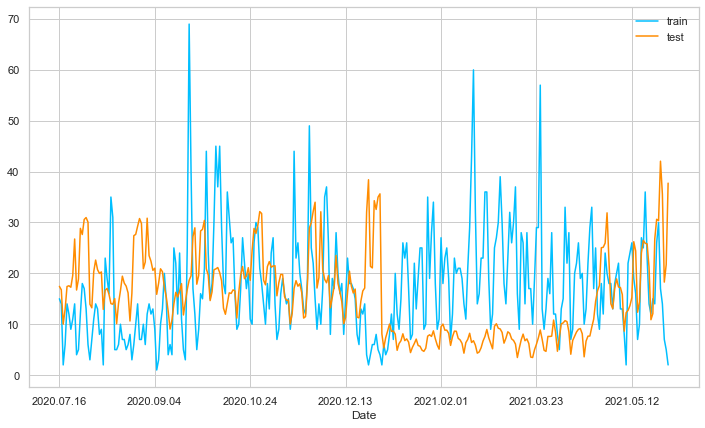

<IPython.core.display.Javascript object>

In [23]:
# Plot the results
results = boston_df.iloc[1282:, :1]

test_values = []
for i in range(0, len(data_test)):
    test_values.append(y_test[i][0])

results["test"] = test_values
results["pred"] = pred_test_lgb
results = results.set_index("Date")

# Fig
fig, ax = plt.subplots(figsize=(12, 7))
np.exp(results["test"]).plot(ax=ax, label="train", color="deepskyblue")
np.exp(results["pred"]).plot(ax=ax, label="test", color="darkorange")
ax.legend()

# IV. Prediction for the year 2023

In [46]:
# Create a data set until 2023
data_2023 = pd.DataFrame()
data_2023["Date"], data_2023["Lockdown_period"], data_2023["Campaigns_flag"] = (
    pd.date_range("01-06-2021", "31-12-2023"),
    "After_lockdown",
    0,
)

data_2023["month"] = pd.DatetimeIndex(data_2023["Date"]).month
data_2023["day"] = pd.DatetimeIndex(data_2023["Date"]).day
data_2023["dayofyear"] = pd.DatetimeIndex(data_2023["Date"]).dayofyear
data_2023["weekofyear"] = pd.DatetimeIndex(data_2023["Date"]).weekofyear
data_2023["weekday"] = pd.DatetimeIndex(data_2023["Date"]).weekday
data_2023["quarter"] = pd.DatetimeIndex(data_2023["Date"]).quarter
data_2023["is_month_start"] = pd.DatetimeIndex(data_2023["Date"]).is_month_start
data_2023["is_month_end"] = pd.DatetimeIndex(data_2023["Date"]).is_month_end

<IPython.core.display.Javascript object>

In [47]:
# Dummy Encoding
x1 = [
    "Lockdown_period",
    "month",
    "weekday",
    "quarter",
    "is_month_start",
    "is_month_end",
]

x2 = [
    "",
    "month",
    "wday",
    "qrtr",
    "m_start",
    "m_end",
]

for i, j in zip(x1, x2):
    data_2023 = pd.get_dummies(
        data_2023, columns=[i], drop_first=False, prefix=j
    )  # drop_first=True,

# Drop columns that we will not use in the models
my_data_new = data_2023.drop(["Date"], axis=1)

<IPython.core.display.Javascript object>

In [48]:
# Insert columns that are present in the train set and absent in the new data set
my_data_new.insert(5, "_Before_lockdown", 0)
my_data_new.insert(6, "_Between_lockdown", 0)
my_data_new.insert(7, "_Lockdown", 0)
my_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Campaigns_flag     1090 non-null   int64
 1   day                1090 non-null   int64
 2   dayofyear          1090 non-null   int64
 3   weekofyear         1090 non-null   int64
 4   _After_lockdown    1090 non-null   uint8
 5   _Before_lockdown   1090 non-null   int64
 6   _Between_lockdown  1090 non-null   int64
 7   _Lockdown          1090 non-null   int64
 8   month_1            1090 non-null   uint8
 9   month_2            1090 non-null   uint8
 10  month_3            1090 non-null   uint8
 11  month_4            1090 non-null   uint8
 12  month_5            1090 non-null   uint8
 13  month_6            1090 non-null   uint8
 14  month_7            1090 non-null   uint8
 15  month_8            1090 non-null   uint8
 16  month_9            1090 non-null   uint8
 17  month_10      

<IPython.core.display.Javascript object>

In [27]:
# Apply Standardize function on the new data
my_data_new = std_scale.transform(my_data_new)

# Predictions
predictions = xgb_mod.predict(my_data_new)
data_2023["Users"] = np.round(np.exp(predictions), 0)

<IPython.core.display.Javascript object>

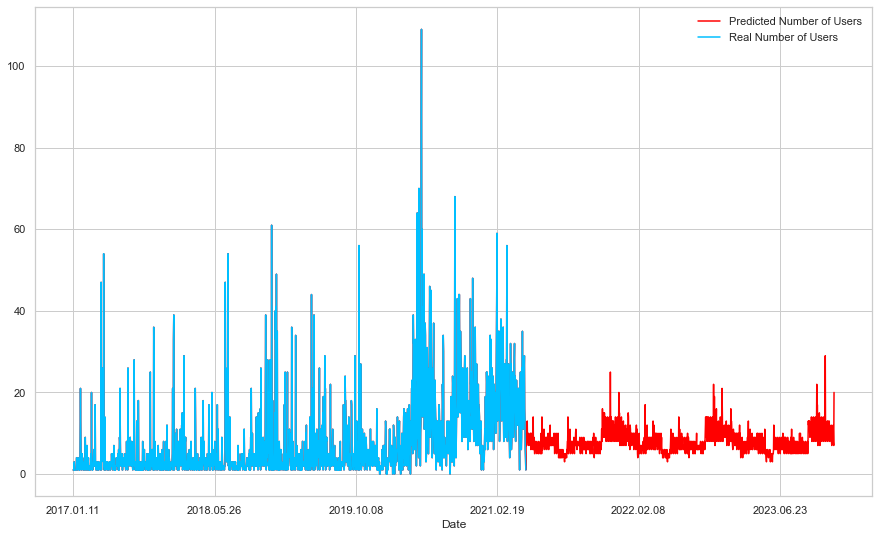

<IPython.core.display.Javascript object>

In [77]:
# Plot the results
df_1 = boston_df.loc[:, ["Date", "Users"]]
df_2 = data_2023.loc[:, ["Date", "Users"]]
df_2["Date"] = df_2["Date"].dt.strftime("%Y.%m.%d")

df = df_1.append(df_2)
df = df.set_index("Date")

# Fig
fig, ax = plt.subplots(figsize=(15, 9))
df["Users"].plot(ax=ax, label="Predicted Number of Users", color="darkgreen")
df_1["Users"].plot(ax=ax, label="Real Number of Users", color="deepskyblue")
ax.legend()